# Using Gensim - Part 2

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_excel('/content/drive/Data/Data_ML.xlsx')
df = df[pd.notnull(df['Business Description'])]
df['Sector ID'] = df['TRBC Economic Sector Name'].factorize(sort=True)[0]
X = df['Business Description']
y = df['Sector ID']
X.shape, y.shape

((23022,), (23022,))

In [3]:
X.head()

0    Cummins Inc. designs, manufactures, distribute...
1    Rio Tinto plc is a mining and metals company. ...
2    Rio Tinto Limited (Rio Tinto) is a mining comp...
3    The Royal Dutch Shell plc explores for crude o...
4    BHP Billiton Plc is a global resources company...
Name: Business Description, dtype: object

In [4]:
y.head()

0    1
1    0
2    0
3    3
4    0
Name: Sector ID, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splits = [X_train, X_test, y_train, y_test]
for _ in splits:
    print(_.shape)

(18417,)
(4605,)
(18417,)
(4605,)


In [6]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
w2i = tokenizer.word_index
len(w2i)

70673

In [7]:
i2w = dict((v,k) for (k,v) in w2i.items())

print(list(w2i)[:10])
print(list(i2w)[:10])

['and', 'the', 'of', 'in', 'company', 'is', 'a', 'as', 'products', 'its']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [0]:
with open('/content/drive/Data/embeddings_gensim.pkl','rb') as f:
  embedding_matrix = pickle.load(f)

In [9]:
embedding_matrix.shape

(10000, 300)

In [10]:
embedding_matrix[50][:150]

array([-0.29492188,  0.08447266,  0.01031494,  0.34570312, -0.09375   ,
        0.05541992,  0.13183594, -0.2734375 , -0.11816406,  0.3125    ,
       -0.296875  , -0.36914062,  0.10058594, -0.1796875 , -0.16894531,
        0.11279297, -0.12255859,  0.27539062, -0.21582031, -0.453125  ,
        0.09472656, -0.16113281,  0.3203125 , -0.328125  ,  0.17382812,
        0.59765625, -0.22070312,  0.19335938, -0.04467773, -0.0625    ,
       -0.13476562, -0.10791016, -0.31445312, -0.05151367, -0.09619141,
       -0.15625   , -0.23828125,  0.01611328,  0.00613403,  0.08203125,
       -0.06787109,  0.16308594,  0.20410156, -0.08837891,  0.20507812,
        0.14648438, -0.04296875,  0.20703125, -0.234375  , -0.10498047,
        0.11132812,  0.20019531, -0.04736328,  0.07275391, -0.29101562,
        0.15625   , -0.19628906, -0.07617188,  0.16699219, -0.265625  ,
       -0.07861328,  0.14453125, -0.24511719, -0.1171875 , -0.25585938,
        0.21972656, -0.21289062, -0.16308594, -0.00408936,  0.12

In [11]:
i2w[50]

'china'

In [12]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

len(X_train_sequences), len(X_test_sequences)

(18417, 4605)

In [13]:
np.array(X_train_sequences[0])

array([ 127,    6,    7,  364,    1, 1035,    3,  184,    9,    1, 6067,
          2,    5,   19,   22,   89,   27, 5631, 3377,    9,    1, 2586,
          1,    2, 5631, 3377,    9,    1,   13,  137,    1,  140, 3617,
          1, 2312, 1459, 1976,    1, 1746, 1038, 4439, 2741, 1038, 1038,
        676,    1, 1038, 4688,  586, 2099,    9,    1, 2560, 5084,    2,
       2586,   13,  235,    1,  140,    7,   81,    3, 2586,   85,   32,
       1038,  367, 2586,  962,    1, 1747,    9,   38,    8, 8754, 2586,
        962,    1, 1262,    2,   13,  235,    1,  140, 2409, 6067,  143,
        229,  963, 6067,    1,  143,    1,   71, 4934])

In [14]:
len(X_train_sequences[0]), len(X_train_sequences[10])

(96, 128)

In [15]:
max_padding = 200

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_padding)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_padding)

X_train_padded.shape, X_test_padded.shape

((18417, 200), (4605, 200))

In [16]:
X_train_padded[10]

array([9448,  470,    6,    7,   53,   59,   25,  165,    2,    5,    6,
         12,    4,    2,  371,    3,    1,   25,    4,   63,   87,   92,
          4,  454,   10,  101,  151,    3,  107,  466,   87,   32,   63,
        174,    1,   71,  239,   10,   63,  239,   18, 9448,  177,  297,
        297, 9448,  177,  780,  426, 9448,  177,  426, 8186, 9448,  177,
        605, 3687, 1295, 9448,  177,  646, 5844, 5430,  177, 1930,    1,
       6936, 2532,   10,  174,  177,   45, 8758,   10,   71,  177,   45,
       9448,  177, 1217,   10,   87,   34,  111,    4, 8759, 6328, 3126,
       3981, 3982,    1, 6329,   10, 2314, 1410,   45,   86,    1,   72,
         82,  346, 1790,  174,  169,   65,   74,  119,   77,  293,  209,
         73,   56,  347,   11,   80,    1, 1422, 1490,  126,  240, 9448,
         28,  493,  473,    6,    2,  482,    3,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [17]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical.shape, y_test_categorical.shape

((18417, 10), (4605, 10))

In [18]:
y_train_categorical[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
embedding_dim = 300

embedding_layer = Embedding(max_words,
                            embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_padding,
                            trainable=False)

sequence_input = Input(shape=(max_padding,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(10, activation='softmax')(x)

model = Model(sequence_input, preds)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_padded, y_train_categorical, batch_size=128, epochs=10, validation_split=0.2)

Train on 14733 samples, validate on 3684 samples
Epoch 1/10
14733/14733 [==============================] - 5s 330us/step - loss: 1.1953 - acc: 0.5892 - val_loss: 0.7979 - val_acc: 0.7286
Epoch 2/10
14733/14733 [==============================] - 3s 221us/step - loss: 0.6223 - acc: 0.7961 - val_loss: 0.6016 - val_acc: 0.8032
Epoch 3/10
14733/14733 [==============================] - 3s 222us/step - loss: 0.4837 - acc: 0.8397 - val_loss: 0.5741 - val_acc: 0.8151
Epoch 4/10
14733/14733 [==============================] - 3s 221us/step - loss: 0.3954 - acc: 0.8699 - val_loss: 0.5923 - val_acc: 0.8056
Epoch 5/10
14733/14733 [==============================] - 3s 221us/step - loss: 0.3150 - acc: 0.8978 - val_loss: 0.6619 - val_acc: 0.8005
Epoch 6/10
14733/14733 [==============================] - 3s 221us/step - loss: 0.2254 - acc: 0.9280 - val_loss: 0.6948 - val_acc: 0.7980
Epoch 7/10
14733/14733 [==============================] - 3s 221us/step - loss: 0.1421 - acc: 0.9559 - val_loss: 0.7528 - v

In [20]:
model.evaluate(X_test_padded, y_test_categorical)

4605/4605 [==============================] - 1s 152us/step


[0.9107638877067193, 0.8236699240215438]

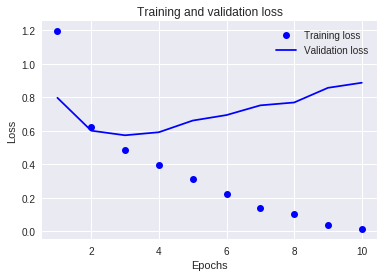

In [21]:
history_dict = history.history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

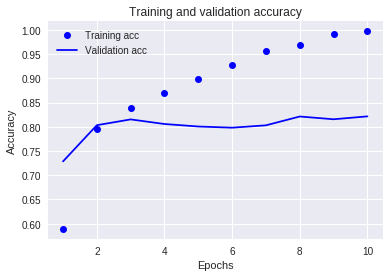

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()